<a href="https://colab.research.google.com/github/prerak2323/MACHINE-LEARNING/blob/LINEAR-AND-POLYNOMIAL-REGRESSION/linearregression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
import pandas as pd
import numpy as np
df=pd.read_csv('Real estate.csv')
dF

,No,house age,distance to the nearest MRT station,number of convenience stores,latitude,longitude,house price of unit area
0,1,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,5.0,390.56840,5,24.97937,121.54245,43.1
...,...,...,...,...,...,...,...
409,410,13.7,4082.01500,0,24.94155,121.50381,15.4
410,411,5.6,90.45606,9,24.97433,121.54310,50.0
411,412,18.8,390.96960,7,24.97923,121.53986,40.6
412,413,8.1,104.81010,5,24.96674,121.54067,52.5


In [16]:
df.keys()

Index(['No', ' house age', 'distance to the nearest MRT station',
       'number of convenience stores', 'latitude', 'longitude',
       'house price of unit area'],
      dtype='object')

In [24]:
df_1=df.drop(['No'],axis=1,)

In [25]:
df_1.keys()

Index([' house age', 'distance to the nearest MRT station',
       'number of convenience stores', 'latitude', 'longitude',
       'house price of unit area'],
      dtype='object')

In [30]:
df_1.isnull().sum().sum() #hence data is clean no null values

0

In [57]:
#no dummy variables hence no one hot encoding
X=df_1.drop('house price of unit area',axis=1)
y=df_1['house price of unit area']

In [146]:
#feature scaling
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=60)

In [147]:
sc=StandardScaler()
sc.fit(X_train)
X_train=sc.transform(X_train)
X_test=sc.transform(X_test)
from sklearn.linear_model import LinearRegression

In [148]:
lr=LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [149]:
ar=lr.predict(X_train)

In [150]:
lr.score(X_test,y_test)

0.6154712129031805

In [151]:
test=pd.DataFrame()
test=df_1.iloc[50:51,0:5]
sc.fit(test)
test_1=sc.transform(test)
test_1

array([[0., 0., 0., 0., 0.]])

In [152]:
lr.predict(test_1)

array([37.70785498])

In [153]:
lr.predict(test_1)

array([37.70785498])

In [190]:
#polynomial regression
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures


In [191]:
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.metrics import label_ranking_average_precision_score
poly_reg=PolynomialFeatures(degree=3)
poly_reg.fit(X_train)
X_train_poly=poly_reg.transform(X_train)
X_test_poly=poly_reg.transform(X_test)
lr=LinearRegression()
lr.fit(X_train_polAy,y_train)
lr.score(X_test_poly,y_test)

0.7365372898864804

In [196]:

par=lr.predict(X_train_poly)
par_1=pd.DataFrame(par,columns=['Price'])
par_1

,Price
0,41.239744
1,30.060331
2,49.994615
3,28.899000
4,33.146348
...,...
326,44.050376
327,23.901142
328,56.925990
329,47.590915


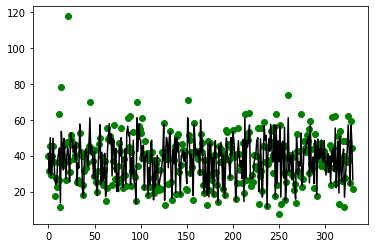

In [185]:
from matplotlib import pyplot as plt
import seaborn as sns
X_train_poly=np.arange(0,len(X_train_poly),1)
plt.scatter(X_train_poly,y_train,color='g') 
plt.plot(X_train_poly,par,color='k')
plt.show()

# New Section